Supp. Fig. 3.

In [1]:
import matplotlib.pyplot as plt
from adjustText import adjust_text

In [2]:
# read chr_steps and chr_accs from csv file
import pandas as pd
import numpy as np

df = pd.read_csv('emb_performance.csv')
df.head()

,chr,chr_steps,chr_accs
0,1,149628.5312,0.9483
1,2,104937.5000,0.9559
2,3,105149.4609,0.9551
3,4,110896.3594,0.9597
4,5,86070.0859,0.9544


# plot all chr

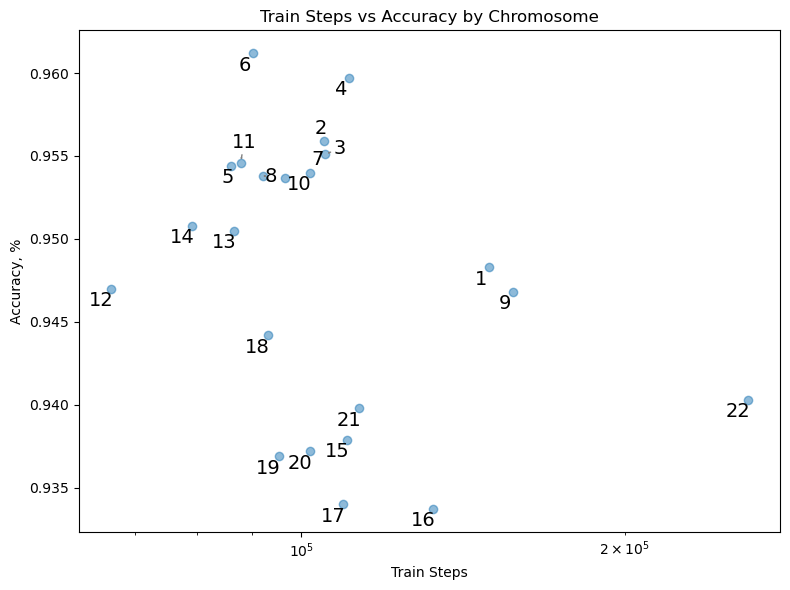

In [3]:
# make a scatter plot of chr_steps vs chr_accs, give each point a label of the chr, and avoid label overlap
chrs = df['chr'].tolist()
chr_steps = df['chr_steps'].tolist()
chr_accs = df['chr_accs'].tolist()
plt.figure(figsize=(8,6))
plt.scatter(chr_steps, chr_accs, alpha=0.5)
plt.xscale('log')

# Add labels for each point, using adjustText to avoid overlap
texts = []
for i, chr in enumerate(chrs):
    texts.append(plt.text(chr_steps[i], chr_accs[i], str(chr), fontsize=14, ha='center', va='center'))

adjust_text(texts, arrowprops=dict(arrowstyle='->', color='gray', lw=1))

plt.xlabel('Train Steps')
plt.ylabel('Accuracy, %')
plt.title('Train Steps vs Accuracy by Chromosome')
plt.tight_layout()
# plt.ylim(95,100)
plt.show()

In [4]:
import sys
sys.path.append('../')
from nature import *

In [5]:
figsize

(3.346456692913386, 3.346456692913386)

0.9477181818181819


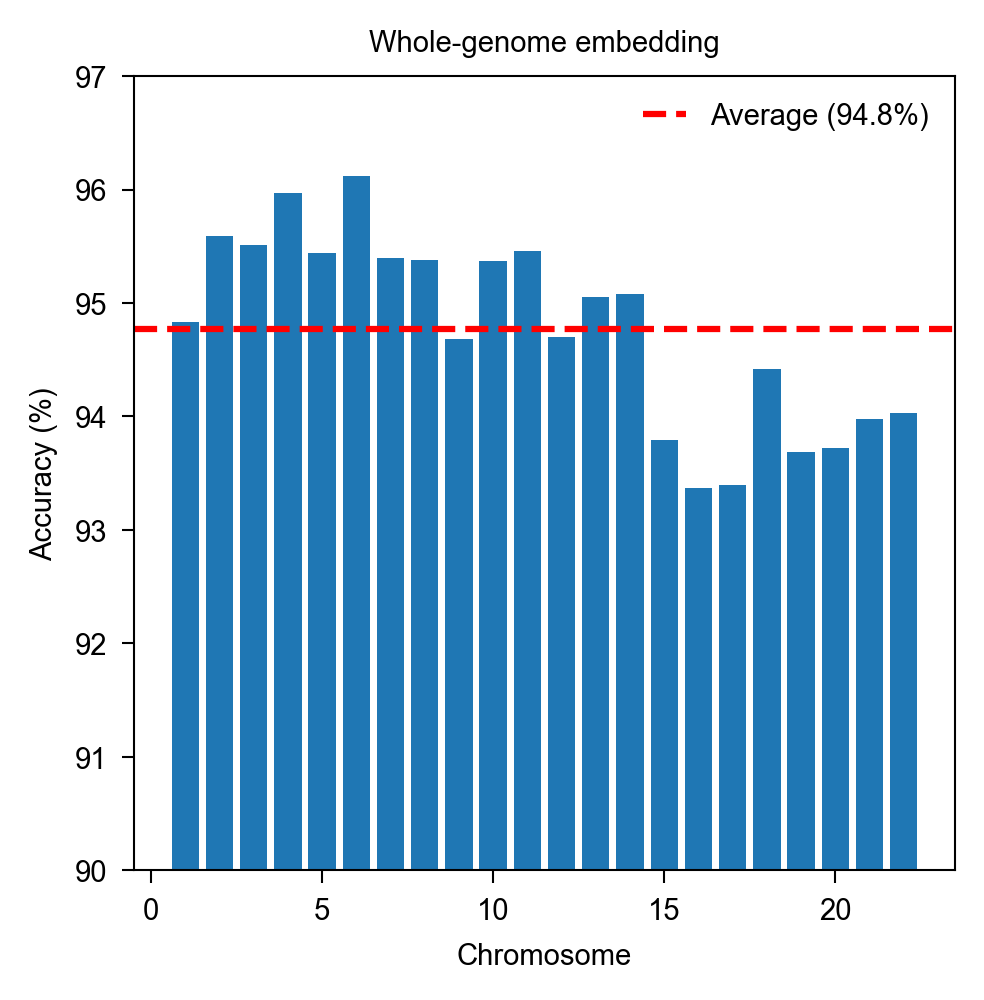

In [6]:
# make a barplot for chr_accs
import numpy as np
mean_acc = np.mean(chr_accs)
print(mean_acc)

plt.figure(figsize=figsize)
plt.bar(chrs, [i*100 for i in chr_accs])

# Add a horizontal line for the average
plt.axhline(mean_acc*100, color='red', linestyle='--', linewidth=1.5, label=f'Average ({mean_acc*100:.1f}%)')

plt.xlabel('Chromosome')
plt.ylabel('Accuracy (%)')
plt.title('Whole-genome embedding')
plt.tight_layout()
plt.ylim(90,97)
plt.legend()
plt.savefig('emb_performance.pdf')
plt.show()
plt.close()